# Pixel centroid changes and mnemonics | PID 2079 Example

For this example, we will use the JWST engineering telemetry database to overplot mnemonmics and events over our timeseries. Mnemonics are useful in detecting anomalies in guidestar data and differentiating technical events on the JWST from the guidestar flux. We will use PID 2079, observation number 4, and visit number 1 and find out if there are any technical anomalies in our data using Spelunker.

First, load the program ID. The download for this PID is long, we are using `spk.readfile` to load in the files that are already in the directory.

In [63]:
cd /Users/galagabits/Developer/FGS-Spelunker/

/Users/galagabits/Developer/FGS-Spelunker


In [64]:
import spelunker

spk = spelunker.load()
spk.readfile(pid=2079, obs_num=4, visit=1)

'''
Use spelunker.load here instead of `spk.readfile` to download the files.
'''
#spk = spelunker.load(pid=2079, obs_num=4, visit=1) 

Current working directory for spelunker: /Users/galagabits/Developer/FGS-Spelunker/spelunker_outputs

['/Users/galagabits/Developer/FGS-Spelunker/spelunker_outputs/mastDownload/JWST/jw02079004001_10101_00004_nis/jw02079004001_gs-fg_2023031214828-seg001_cal.fits', '/Users/galagabits/Developer/FGS-Spelunker/spelunker_outputs/mastDownload/JWST/jw02079004001_10101_00004_nis/jw02079004001_gs-fg_2023031214828-seg002_cal.fits', '/Users/galagabits/Developer/FGS-Spelunker/spelunker_outputs/mastDownload/JWST/jw02079004001_10101_00004_nis/jw02079004001_gs-fg_2023031214829-seg001_cal.fits', '/Users/galagabits/Developer/FGS-Spelunker/spelunker_outputs/mastDownload/JWST/jw02079004001_10101_00004_nis/jw02079004001_gs-fg_2023031214829-seg002_cal.fits', '/Users/galagabits/Developer/FGS-Spelunker/spelunker_outputs/mastDownload/JWST/jw02079004001_10101_00004_nis/jw02079004001_gs-fg_2023031231651-seg003_cal.fits', '/Users/galagabits/Developer/FGS-Spelunker/spelunker_outputs/mastDownload/JWST/jw02079004001

'\nUse spelunker.load here instead of `spk.readfile` to download the files.\n'

You will need to input your MAST API Token to access JWST Engineering Telemetry and mnemonics.

In [65]:
spk.mast_api_token = 'MAST_API_TOKEN'

Lets look at how many guidestars this program uses.

In [66]:
spk.object_properties

,guidestar_catalog_id,GAIAdr3sourceID,int_start,int_stop,ra,dec,Jmag,Hmag
0,S33T007497,5057488505467609856,59975.839346,59975.877272,53.227852,-27.900351,13.7611,13.2482


There is only one guidestar used within this program. Lets look at the flux timeseries for the guidestar in the program.

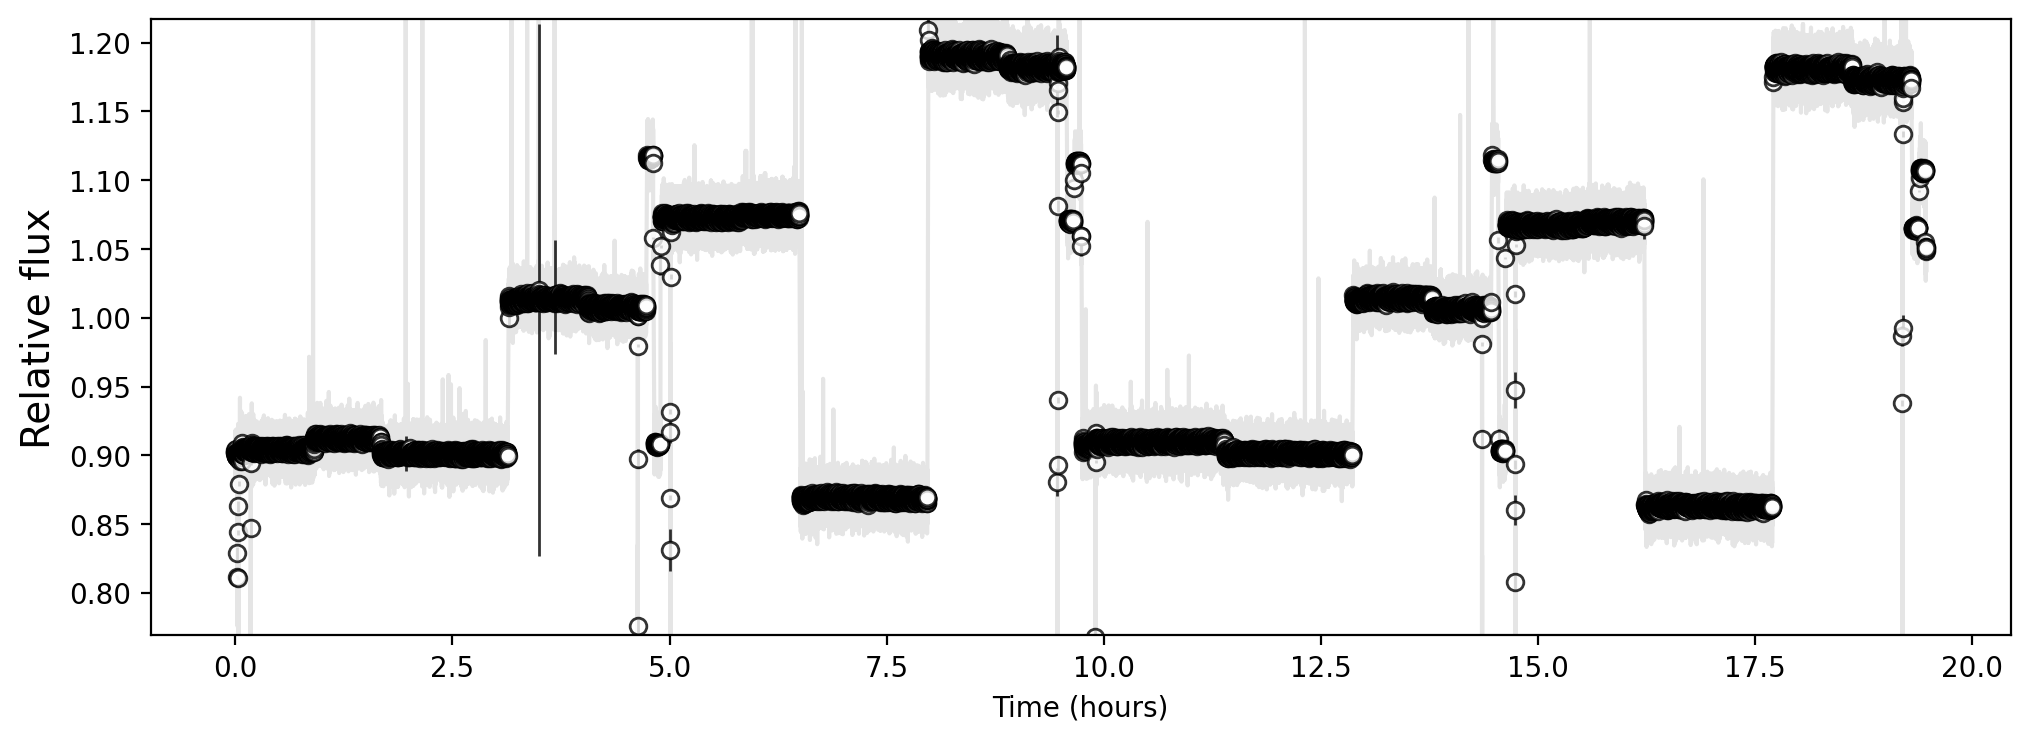

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,4), dpi=200)

ax = spk.timeseries_binned_plot(spk.fg_time, spk.fg_flux)

We can see that the timeseries is broken up into sepeate pieces. Lets see how the pixel cooridinates, pixel standard deviation and Gaussian fitted amplitude of the guidestar changes overtime. We fitted gaussians to each frame using `spk.gauss2d_fit` and saved the outpput as an astropy table `dat` file, so we can load the table here.

In [70]:
from astropy.io import ascii
gaussfit_table = ascii.read('/Users/galagabits/Developer/FGS-Spelunker/JWST-FGS-Spelunker/notebooks/examples/data/pid2079_observation04_visit1_short.dat') # Navigate to the included Gaussian results file
time = spk.fg_time[1300000:1900000] # The Gaussian table was cut short to fit in GitHub, so the time needs to be the same shape as well.

array([[<Axes: title={'center': 'Centroid_x'}, xlabel='Time (hours)', ylabel='Pixel'>,
        <Axes: title={'center': 'Centroid_y'}, xlabel='Time (hours)', ylabel='Pixel'>],
       [<Axes: title={'center': 'stddev_x'}, xlabel='Time (hours)', ylabel='Pixel'>,
        <Axes: title={'center': 'stddev_y'}, xlabel='Time (hours)', ylabel='Pixel'>],
       [<Axes: title={'center': 'amplitude'}, xlabel='Time (hours)', ylabel='Counts'>,
        <Axes: title={'center': 'theta'}, xlabel='Time (hours)', ylabel='Radians'>],
       [<Axes: title={'center': 'offset'}, xlabel='Time (mjd)', ylabel='Counts'>,
        <Axes: >]], dtype=object)

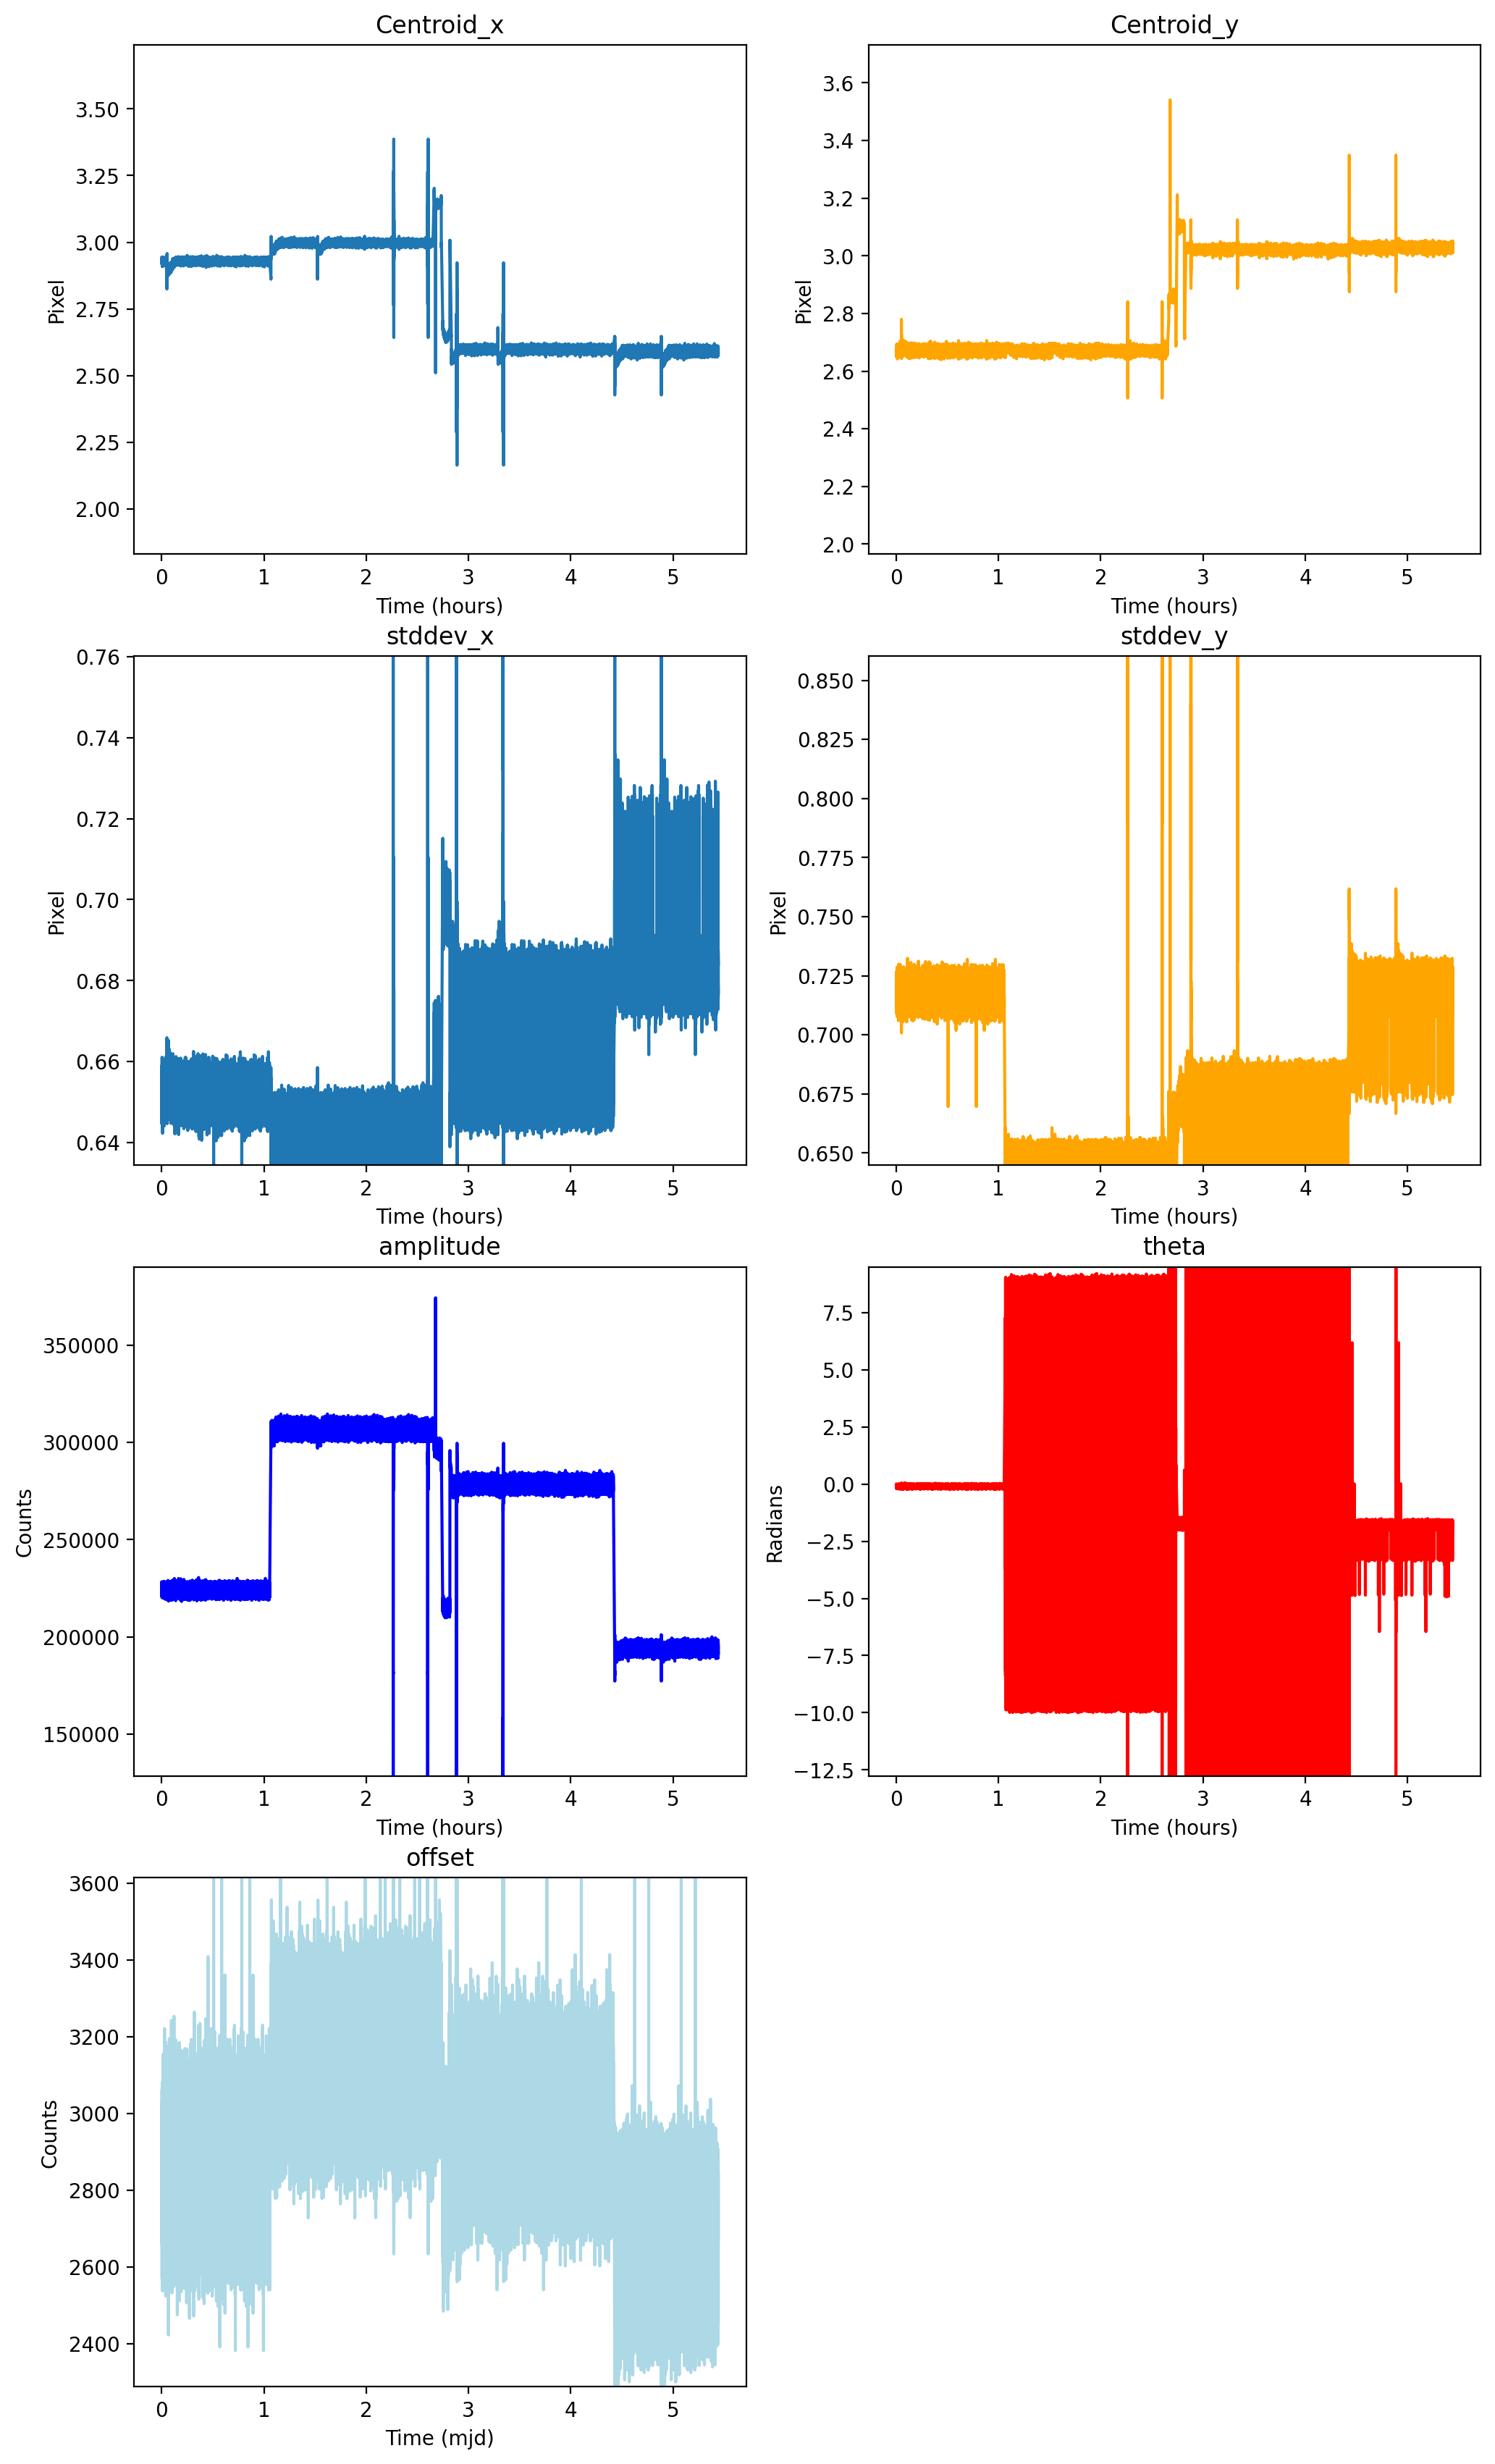

In [71]:
spk.timeseries_list_plot(gaussfit_table, time)

We can clearly see that there are some periodic changes in the centroids every hour with even smaller changes within. Lets look into one of the centroid plots.

(59976.331245082925, 59976.55800643445)

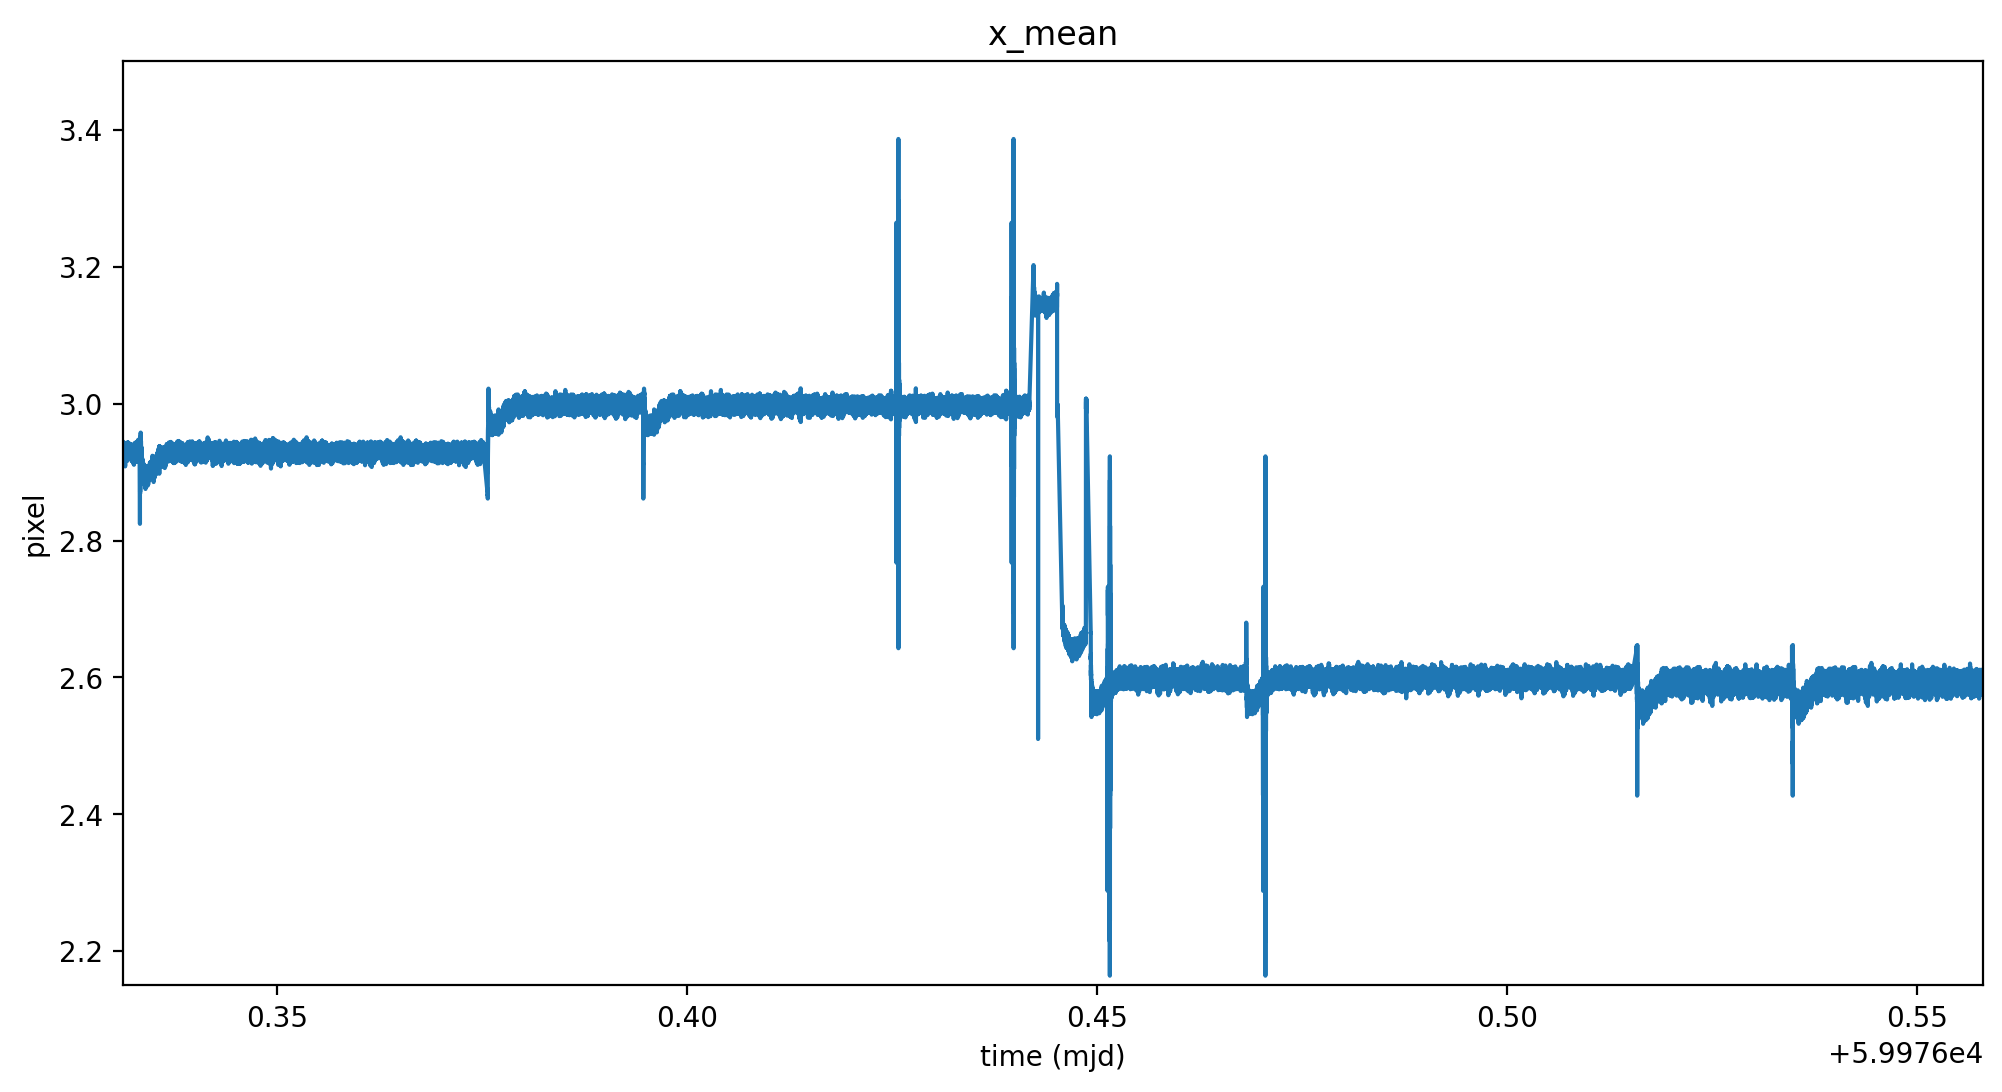

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6), dpi=200)

ax.plot(time, gaussfit_table['x_mean'])
ax.set_ylabel('pixel')
ax.set_xlabel('time (mjd)')
ax.set_title('x_mean')
ax.set_ylim(2.15,3.5)
ax.set_xlim(59976.331245082925, 59976.55800643445)

We can see there is multiple events happening. First off, there are certain breaks between the timeseries, which indicates the time where the FGS was not observing. Everytime the FGS starts observing again, the flux changes, even though we know the guidestar is the same. This raises more investigative questions such as why does the flux change after each observation if we are looking at the same target? Let's apply mnemonics and zoom into one event.

(59976.331245082925, 59976.55800643445)

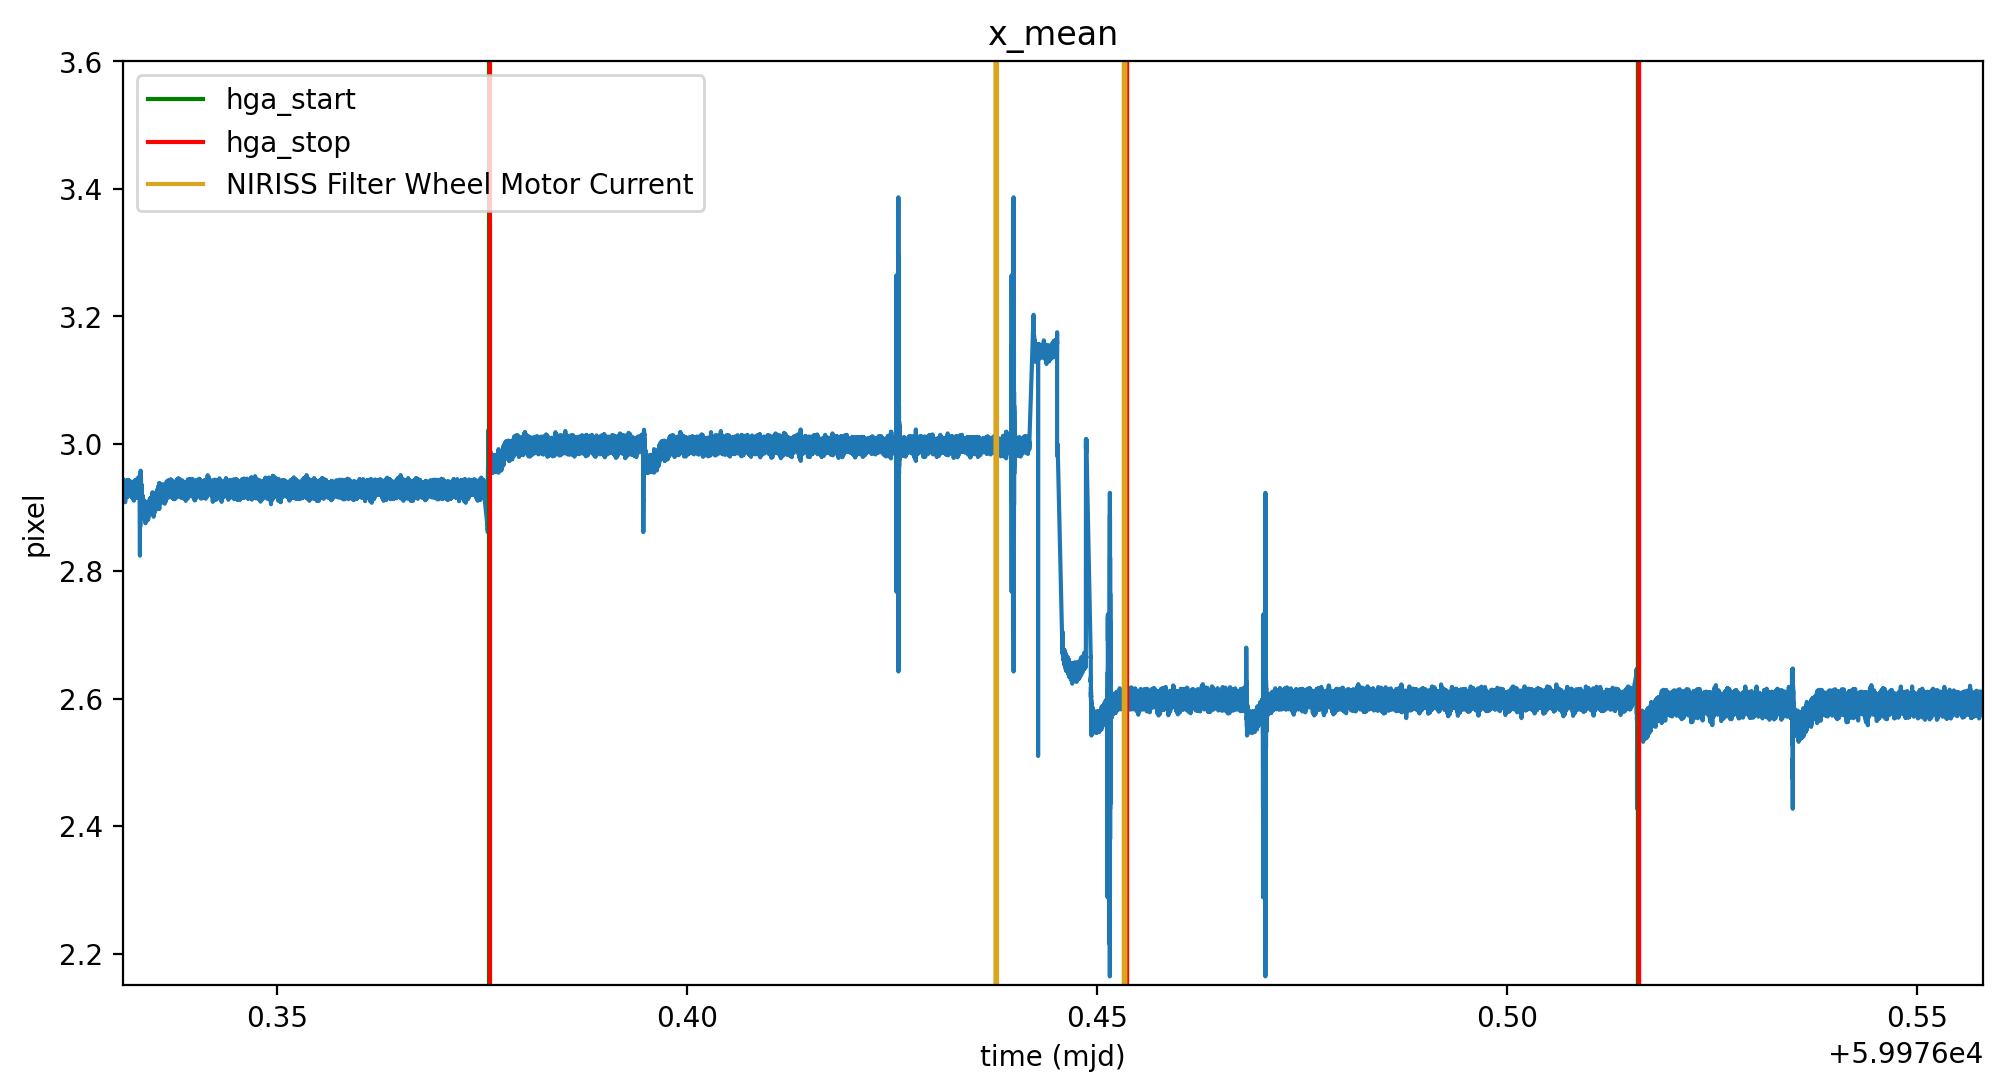

In [73]:
fig, ax = plt.subplots(figsize=(12,6), dpi=200)

ax.plot(time, gaussfit_table['x_mean'], alpha=1)

ax = spk.mnemonics('SA_ZHGAUPST', 59976.331245082925, 59976.55800643445)
ax1 = spk.mnemonics('INIS_FWMTRCURR', 59976.331245082925, 59976.55800643445)

ax.legend()

ax.set_ylabel('pixel')
ax.set_xlabel('time (mjd)')
ax.set_title('x_mean')
ax.set_ylim(2.15,3.6)
ax.set_xlim(59976.331245082925, 59976.55800643445)

(59976.5157, 59976.51625)

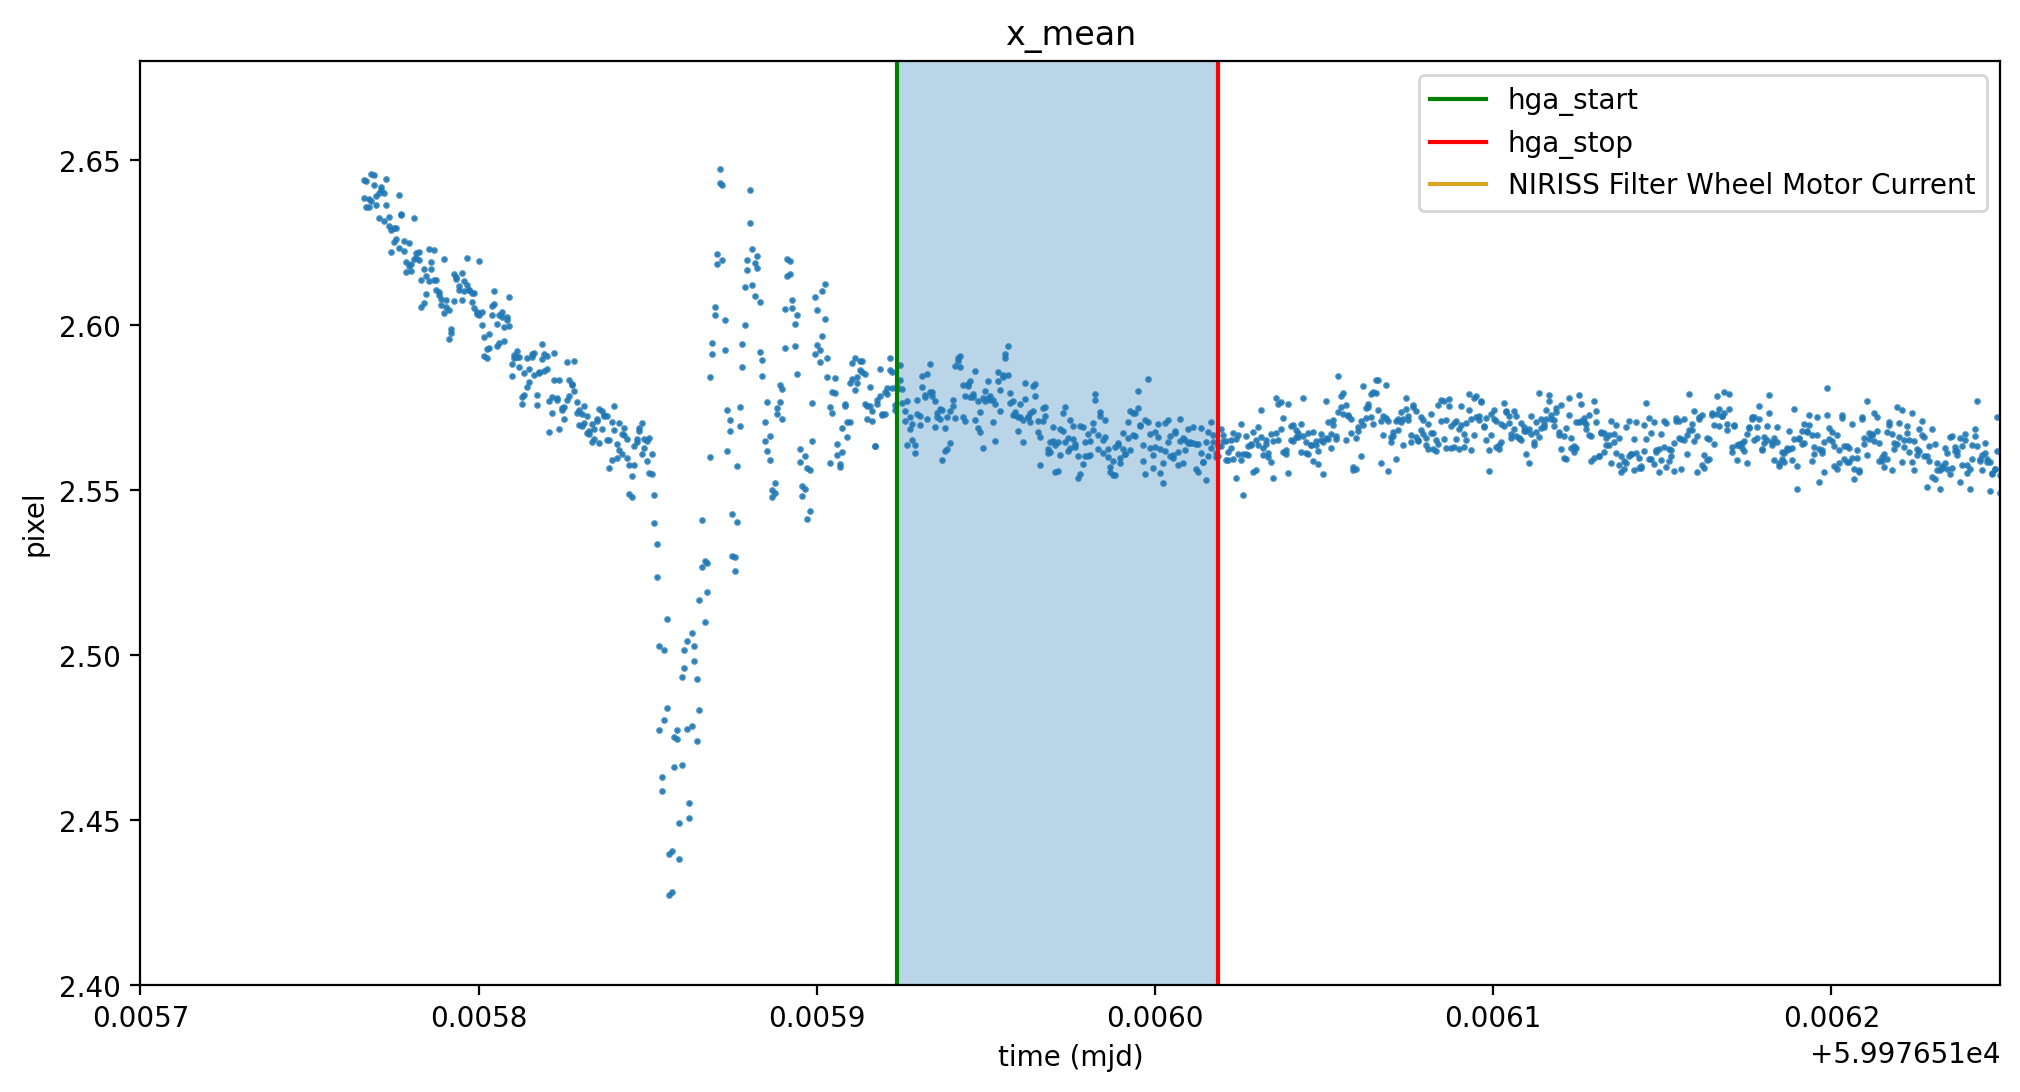

In [74]:
fig, ax = plt.subplots(figsize=(12,6), dpi=200)

ax.scatter(time, gaussfit_table['x_mean'], alpha=.8, s=2)

ax = spk.mnemonics('SA_ZHGAUPST', 59976.5, 59976.6)
ax1 = spk.mnemonics('INIS_FWMTRCURR', 59976.5, 59976.6)

ax.legend()

ax.set_ylabel('pixel')
ax.set_xlabel('time (mjd)')
ax.set_title('x_mean')
ax.set_ylim(2.4,2.68)
ax.set_xlim(59976.51570, 59976.51625)

(59976.5157, 59976.51625)

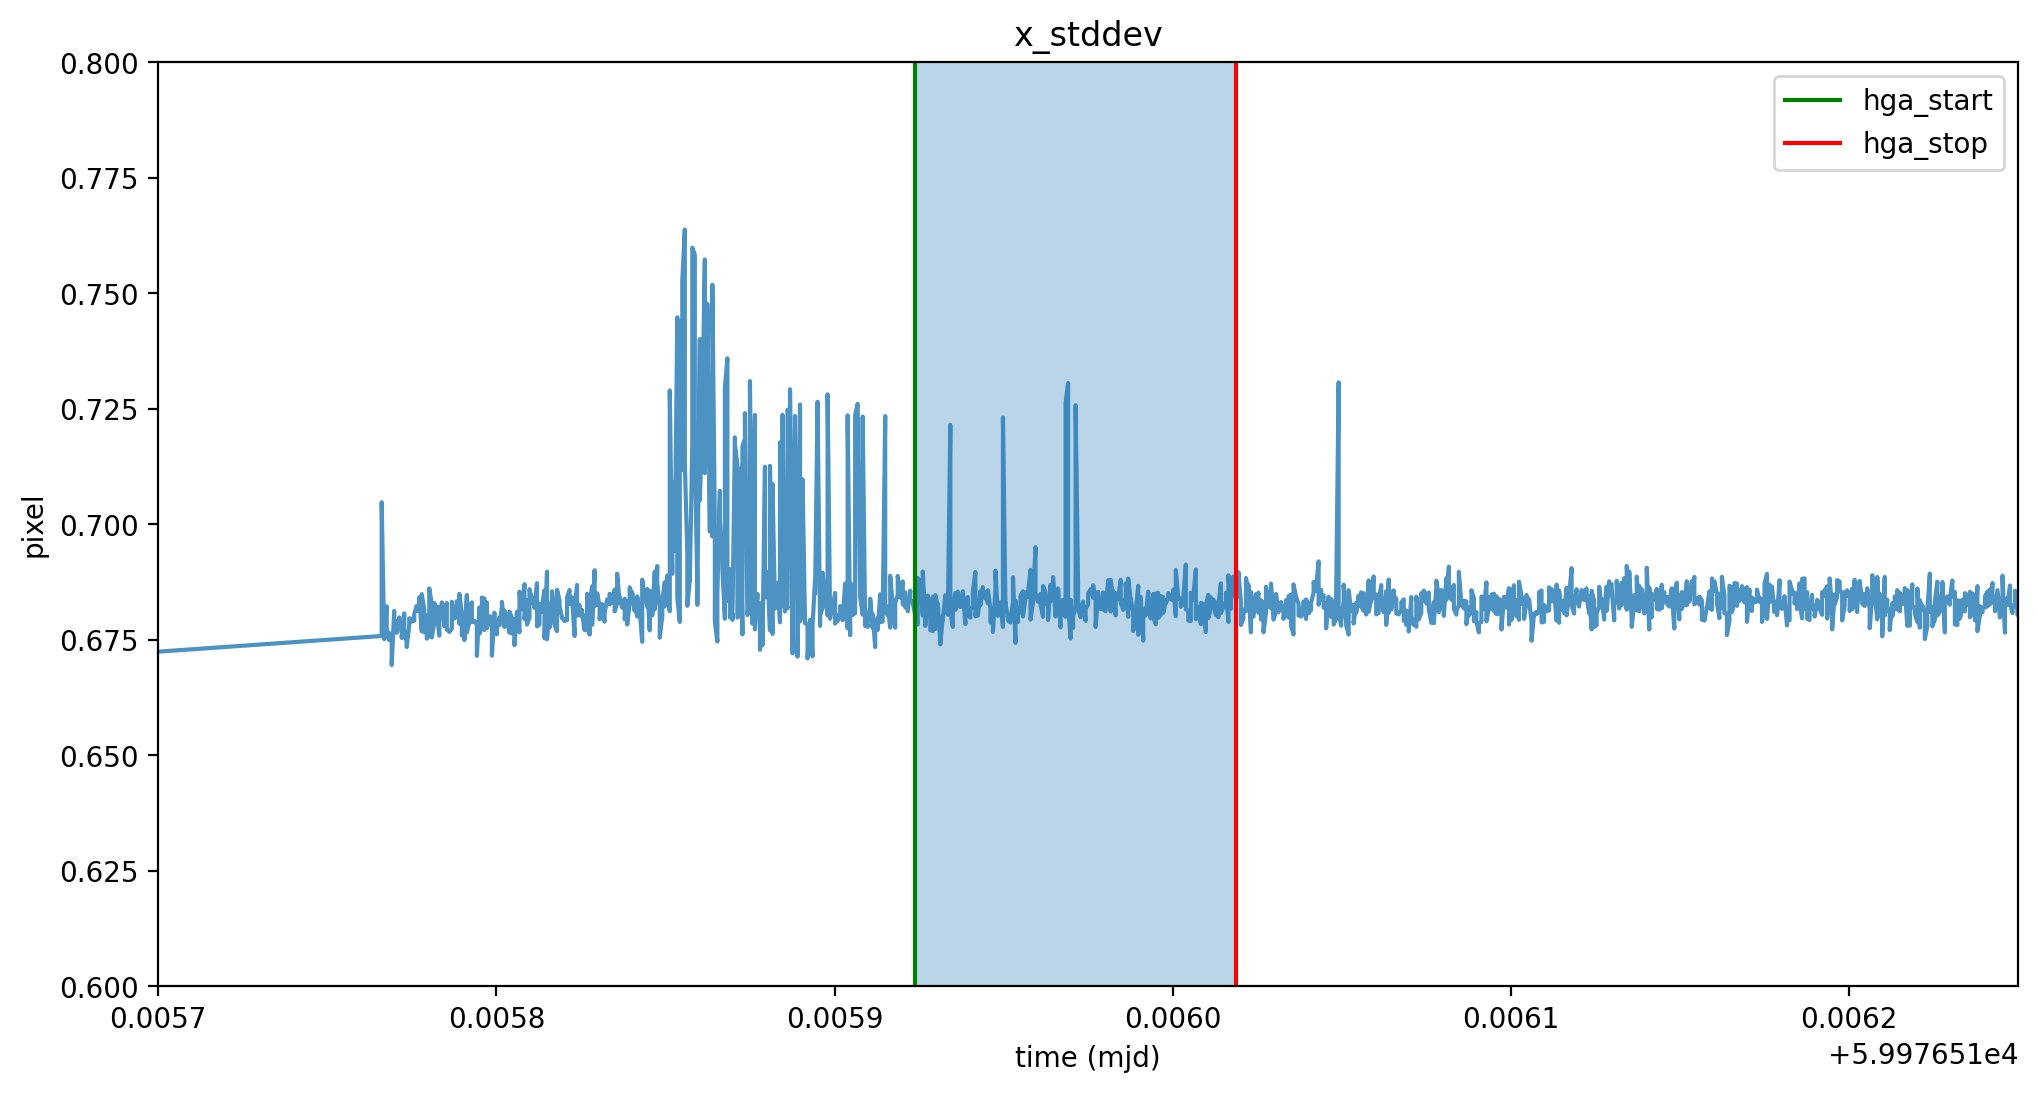

In [75]:
fig, ax = plt.subplots(figsize=(12,6), dpi=200)

ax.plot(time, gaussfit_table['x_stddev'], alpha=.8,)

ax = spk.mnemonics('SA_ZHGAUPST', 59976.5, 59976.6)

ax.legend()

ax.set_ylabel('pixel')
ax.set_xlabel('time (mjd)')
ax.set_title('x_stddev')
ax.set_ylim(0.6,0.8)
ax.set_xlim(59976.51570, 59976.51625)

(59976.5157, 59976.51625)

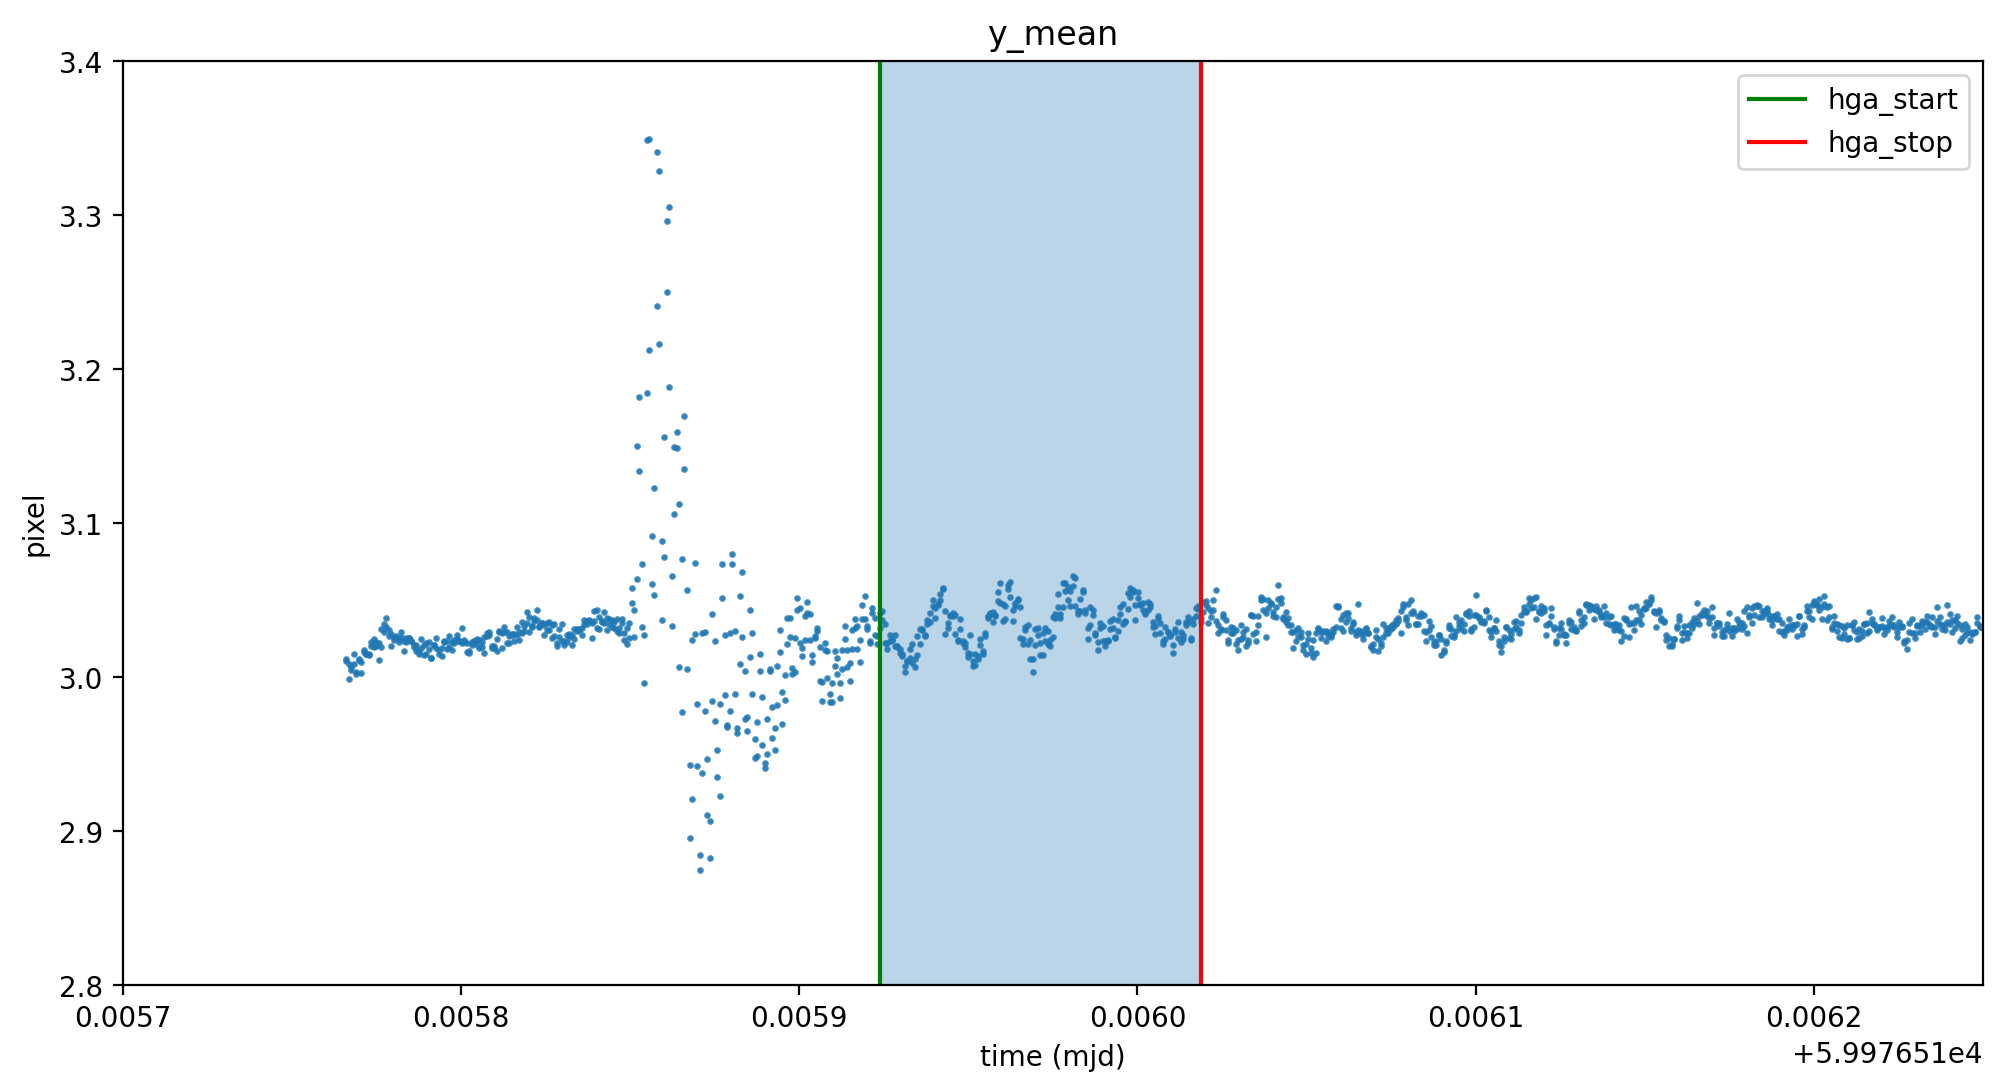

In [76]:
fig, ax = plt.subplots(figsize=(12,6), dpi=200)

ax.scatter(time, gaussfit_table['y_mean'], alpha=.8, s=2)

ax = spk.mnemonics('SA_ZHGAUPST', 59976.5, 59976.6)

ax.legend()

ax.set_ylabel('pixel')
ax.set_xlabel('time (mjd)')
ax.set_title('y_mean')
ax.set_ylim(2.8,3.4)
ax.set_xlim(59976.51570, 59976.51625)

We can clearly see that some of the centroid movement can be attributed to the high-gain antenna (HGA) and even events from the NIRISS Filter Wheel. Additionally, in the zoomed in x centroid plot, a tilt event occurs when the HGA is moving. The JWST mirror seems to "snap" and slightly change in orientation, thus causing the `x_mean` in the guidestar data to change suddenly. At this time, the `x_stddev` spikes as well. Using the changes of pixel standard devivation or guidestar PSF is useful in detecting tilt events in your data.